In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

FOLDER_PATH_DATA_STORE = "data_store"
DATA_STORE_TYPES = ["csv"]
DATA_SOURCES = ["asrs", "ntsb"]

unique_ids = ["20240613175806", "20240613183516"]
data_type = DATA_STORE_TYPES[0]


# ASRS

## List tables

In [2]:
asrs_source_name = DATA_SOURCES[0]
asrs_unique_id = unique_ids[0]

asrs_folder_path = os.path.join("../", FOLDER_PATH_DATA_STORE, f"{asrs_source_name}_store",data_type, asrs_unique_id)
asrs_file_name_list_unsorted = os.listdir(asrs_folder_path)
asrs_file_name_list = sorted(asrs_file_name_list_unsorted)
# file_name_list

asrs_name_list = [file_name.replace(' ', '_').lower().split('.')[0] for file_name in asrs_file_name_list]
asrs_name_list

['aircraft_1',
 'aircraft_2',
 'assessments',
 'component',
 'environment',
 'events',
 'person_1',
 'person_2',
 'place',
 'report_1',
 'report_2',
 'time',
 'unnamed:_125']

## Build Data Dict

In [3]:
asrs_data = {}

for i, row in enumerate(asrs_file_name_list):
    key = asrs_name_list[i]
    asrs_data[key] = pd.read_csv(os.path.join(asrs_folder_path, row), low_memory=False)

## Select Tables

In [21]:
asrs_assessments = asrs_data['assessments'].copy()

asrs_assessments['Contributing_Factors'] = asrs_assessments['Contributing Factors / Situations']
asrs_assessments['Primary_Problem'] = asrs_assessments['Primary Problem']


# if asrs_assessments['Contributing_Factors'].isnull().mean() *100 > 0:


# asrs_assessments['Primary Problem'].isnull().mean() *100

# asrs_assessments[asrs_assessments['Primary Problem'].isnull()]

# asrs_data['events'][asrs_data['events']['ACN'] == 1937867]['Anomaly']
# asrs_data['person_1'][asrs_data['person_1']['ACN'] == 1937867]
# asrs_data['person_1']
# asrs_assessments
data = asrs_data['report_1'].copy()
data['Contributing_Factors'] = asrs_assessments['Contributing_Factors']
data['Primary_Problem'] = asrs_assessments['Primary_Problem']

data['Narrative'] = data['Narrative'].fillna('')
data['Synopsis'] = data['Synopsis'].fillna('')
data['Contributing_Factors'] = data['Contributing_Factors'].fillna('')
data['Primary_Problem'] = data['Primary_Problem'].fillna('NONE')
data

# data['contributing_factors'].isnull().mean() * 100

,ACN,Narrative,Callback,Synopsis,Contributing_Factors,Primary_Problem
0,866849,Ocean West and Offshore West/Central were comb...,NaN,ZHU Controllers reported that poorly coordinat...,ATC Equipment / Nav Facility / Buildings; Huma...,Human Factors
1,866859,Aircraft X had a flight plan in URET (user req...,NaN,ZAU Controller reported an aircraft had a diff...,Human Factors; Procedure,Human Factors
2,866866,I was working D-79 when Aircraft X reported ov...,NaN,ZHU Controller reported an aircraft handed off...,Procedure; Human Factors; ATC Equipment / Nav ...,Human Factors
3,866977,Descending to FL340 we got a Green Hydraulic L...,NaN,An A320 crew reported a HYD G RSVR LO LVL ECAM...,Aircraft,Aircraft
4,866984,On climbout at approximately 15;000 FT noticed...,NaN,An E145 diverted to the nearest suitable airpo...,Aircraft,Aircraft
...,...,...,...,...,...,...
73601,2085076,Cleared by ground to leave FBO ramp via taxiwa...,NaN,Corporate pilot reported a taxiway incursion; ...,Airport; Chart Or Publication; Procedure; Huma...,Airport
73602,2085081,On approach to Runway 34L I had a LOC/coupling...,NaN,Cessna Citation pilot reported the aircraft's ...,Aircraft; Software and Automation,Software and Automation
73603,2085092,Sequencing and separation of aircraft are noto...,Reporter stated that high volume of traffic at...,Cessna 172 pilot reported a violent wake turbu...,Environment - Non Weather Related; Procedure,Procedure
73604,2085412,CYEG HAMPO 2 Departure Runway 20. On our brief...,NaN,Air carrier Captain reported a track deviation...,Procedure; Airspace Structure; Chart Or Public...,Airspace Structure


In [22]:

# Split the 'HumanFactors' column by the delimiter ';' and expand into separate columns
human_factors_split = data['Contributing_Factors'].str.split(';', expand=True)

# Rename the columns to something meaningful
human_factors_split.columns = [f'Contributing_Factors{i+1}' for i in range(human_factors_split.shape[1])]
# Concatenate the original dataframe with the new human factors columns
data = pd.concat([data, human_factors_split], axis=1)

# data = data.reset_index(drop=True)
# data['HumanFactors'] = data['HumanFactors'].str.split(';').explode().str.strip()
# data['HumanFactors'] =  data['HumanFactors'].explode().str.strip()
time_data = asrs_data['time'].copy()
time_data['DateTime'] = pd.to_datetime(time_data['Date'], format='%Y%m', errors='coerce')
data['DateTime'] = time_data['DateTime']
data['Year'] = time_data['DateTime'].dt.year
data['Month'] = time_data['DateTime'].dt.month

# data = data[data['Year'] == 2023]
# data

# Sample a subset of the data for faster training
data = data.sample(frac=0.1, random_state=42) 
data
# data_sampled

,ACN,Narrative,Callback,Synopsis,Contributing_Factors,Primary_Problem,Contributing_Factors1,Contributing_Factors2,Contributing_Factors3,Contributing_Factors4,Contributing_Factors5,Contributing_Factors6,Contributing_Factors7,Contributing_Factors8,Contributing_Factors9,Contributing_Factors10,DateTime,Year,Month
40938,1489429,The weather was clear and smooth and after dar...,NaN,B737 First Officer reported that a SID crossin...,Human Factors,Human Factors,Human Factors,None,None,None,None,None,None,None,None,None,2017-10-01,2017,10
30369,1310361,Last night; [early evening]; I walked up the G...,NaN,An Aircraft Maintenance Technician reports abo...,Company Policy; Staffing; Procedure; Human Fac...,Company Policy,Company Policy,Staffing,Procedure,Human Factors,Environment - Non Weather Related,None,None,None,None,None,2015-11-01,2015,11
32504,1342763,A line of thunderstorms was approaching PNS fr...,NaN,An EMB-145 Captain reported losing reliable ai...,Aircraft; Weather,Weather,Aircraft,Weather,None,None,None,None,None,None,None,None,2016-03-01,2016,3
652,874102,A CRJ-200 had an altitude select problem; it w...,Reporter stated all Operators of the CRJ-200's...,An Air Carrier Maintenance Manager reports on ...,Aircraft; Manuals,Aircraft,Aircraft,Manuals,None,None,None,None,None,None,None,None,2010-01-01,2010,1
37280,1424003,I was working Local Control. The airport was i...,NaN,HIO Tower Controller reported an airborne conf...,Human Factors; Staffing; Procedure,Procedure,Human Factors,Staffing,Procedure,None,None,None,None,None,None,None,2017-02-01,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12539,1004242,PAO was on Runway 13 and NUQ was on Runway 14....,NaN,PAO Controller described a NMAC when traffic o...,Airspace Structure; Procedure; Human Factors,Procedure,Airspace Structure,Procedure,Human Factors,None,None,None,None,None,None,None,2012-04-01,2012,4
28617,1284428,Working sector 37 with sectors 38/6400/25/65 c...,NaN,ZDV Controller reported of traffic overload an...,Human Factors; Staffing; Weather,Weather,Human Factors,Staffing,Weather,None,None,None,None,None,None,None,2015-08-01,2015,8
52373,1692190,Aircraft had an issue with a piece of required...,NaN,Technician reported Dispatch directing flight ...,Aircraft; Human Factors; Logbook Entry; Proced...,Procedure,Aircraft,Human Factors,Logbook Entry,Procedure,Company Policy,None,None,None,None,None,2019-10-01,2019,10
11558,991465,ZBW transitioned to new Q routing's through ou...,NaN,ZBW Controller voiced concern regarding the ne...,ATC Equipment / Nav Facility / Buildings; Proc...,ATC Equipment / Nav Facility / Buildings,ATC Equipment / Nav Facility / Buildings,Procedure,None,None,None,None,None,None,None,None,2012-01-01,2012,1


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
import re

# Define preprocessing functions
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

def extract_terms(text, min_length=2, max_length=200):
    terms = re.findall(r'\b\w{%d,%d}\b' % (min_length, max_length), text)
    return ' '.join(terms)

# Preprocess data
data['Narrative'] = data['Narrative'].apply(remove_stopwords).apply(extract_terms)
data['Synopsis'] = data['Synopsis'].apply(remove_stopwords).apply(extract_terms)

# Combine Narrative and Synopsis for feature extraction
data['Combined_Text'] = data['Narrative'] + ' ' + data['Synopsis']

# TF-IDF weighting
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Combined_Text'])

# Normalize
normalized_matrix = normalize(tfidf_matrix, norm='l2')


## Contributing_Factors1

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Assume 'human_factors_labels' is your target variable for human factors classification
X_train, X_test, y_train, y_test = train_test_split(normalized_matrix, data['Contributing_Factors1'], test_size=0.25, random_state=42)

classifier_human_factors = OneVsRestClassifier(SVC(kernel='rbf', class_weight='balanced'))
classifier_human_factors.fit(X_train, y_train)

# Evaluate performance
y_pred_human_factors = classifier_human_factors.predict(X_test)
print(classification_report(y_test, y_pred_human_factors))


                                              precision    recall  f1-score   support

                                                   0.00      0.00      0.00         1
    ATC Equipment / Nav Facility / Buildings       0.00      0.00      0.00         5
                                    Aircraft       0.74      0.88      0.80        58
                                     Airport       0.00      0.00      0.00        12
                          Airspace Structure       0.00      0.00      0.00         7
                        Chart Or Publication       0.00      0.00      0.00         3
                              Company Policy       0.00      0.00      0.00         2
           Environment - Non Weather Related       0.00      0.00      0.00        15
                         Equipment / Tooling       0.00      0.00      0.00         1
                               Human Factors       0.46      0.91      0.61        53
Incorrect / Not Installed / Unavailable Part       0.

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_module

In [81]:
# from sklearn.decomposition import PCA
# from joblib import Parallel, delayed
# from sklearn.model_selection import train_test_split
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report

# # Apply PCA to reduce the number of features
# pca = PCA(n_components=100)  # Adjust the number of components as needed
# X_reduced = pca.fit_transform(normalized_matrix)

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X_reduced, data['HumanFactor_1'], test_size=0.25, random_state=42)

# # Train the model using parallel processing
# classifier_human_factors = OneVsRestClassifier(SVC(kernel='rbf', class_weight='balanced', max_iter=1000), n_jobs=-1)
# classifier_human_factors.fit(X_train, y_train)

# # Evaluate performance
# y_pred_human_factors = classifier_human_factors.predict(X_test)
# print(classification_report(y_test, y_pred_human_factors))


/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.w

                          precision    recall  f1-score   support

 Communication Breakdown       0.30      0.44      0.36       207
               Confusion       0.21      0.14      0.17        58
             Distraction       0.25      0.02      0.04        45
                 Fatigue       0.00      0.00      0.00         6
 Human-Machine Interface       0.00      0.00      0.00        27
                  Not HF       0.48      0.50      0.49       216
         Other / Unknown       0.00      0.00      0.00        13
   Physiological - Other       0.00      0.00      0.00         4
   Situational Awareness       0.31      0.49      0.38       227
           Time Pressure       0.20      0.11      0.14        85
Training / Qualification       0.00      0.00      0.00        34
         Troubleshooting       0.27      0.26      0.26       111
                Workload       0.10      0.02      0.04        91

                accuracy                           0.32      1124
        

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_module

In [9]:
import matplotlib.pyplot as plt

# Assuming you have a 'date' column in your dataset
data['year_month'] = data['DateTime'].dt.to_period('M')

# Combine predictions with original data
data['human_factors_pred'] = classifier_human_factors.predict(normalized_matrix)

data


,ACN,Narrative,Callback,Synopsis,Contributing_Factors,Contributing_Factors1,Contributing_Factors2,Contributing_Factors3,Contributing_Factors4,Contributing_Factors5,...,Contributing_Factors7,Contributing_Factors8,Contributing_Factors9,Contributing_Factors10,DateTime,Year,Month,Combined_Text,year_month,human_factors_pred
40938,1489429,The weather clear smooth dark terrain officer ...,NaN,B737 First Officer reported SID crossing restr...,Human Factors,Human Factors,None,None,None,None,...,None,None,None,None,2017-10-01,2017,10,The weather clear smooth dark terrain officer ...,2017-10,Human Factors
30369,1310361,Last night early evening walked Gate Jetway tr...,NaN,An Aircraft Maintenance Technician reports num...,Company Policy; Staffing; Procedure; Human Fac...,Company Policy,Staffing,Procedure,Human Factors,Environment - Non Weather Related,...,None,None,None,None,2015-11-01,2015,11,Last night early evening walked Gate Jetway tr...,2015-11,Company Policy
32504,1342763,line thunderstorms approaching PNS west After ...,NaN,An EMB 145 Captain reported losing reliable ai...,Aircraft; Weather,Aircraft,Weather,None,None,None,...,None,None,None,None,2016-03-01,2016,3,line thunderstorms approaching PNS west After ...,2016-03,Aircraft
652,874102,CRJ 200 altitude select problem reset climb de...,Reporter stated all Operators of the CRJ-200's...,An Air Carrier Maintenance Manager reports con...,Aircraft; Manuals,Aircraft,Manuals,None,None,None,...,None,None,None,None,2010-01-01,2010,1,CRJ 200 altitude select problem reset climb de...,2010-01,Aircraft
37280,1424003,working Local Control The airport unusual flow...,NaN,HIO Tower Controller reported airborne conflic...,Human Factors; Staffing; Procedure,Human Factors,Staffing,Procedure,None,None,...,None,None,None,None,2017-02-01,2017,2,working Local Control The airport unusual flow...,2017-02,Human Factors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55508,1745485,picking aircraft ZZZ airport extensive annual ...,NaN,Pilot reported taxiway incursion citing distra...,Human Factors,Human Factors,None,None,None,None,...,None,None,None,None,2020-06-01,2020,6,picking aircraft ZZZ airport extensive annual ...,2020-06,Human Factors
21885,1167253,We received clearance descend FL240 descend Ko...,NaN,CRJ 700 Captain reports cleared descend FL240 ...,Human Factors,Human Factors,None,None,None,None,...,None,None,None,None,2014-04-01,2014,4,We received clearance descend FL240 descend Ko...,2014-04,Human Factors
15518,1046796,We discrepancies flight Upon arrival gate Mech...,NaN,A319 Captain aware landing flight attendant ox...,Human Factors; Procedure,Human Factors,Procedure,None,None,None,...,None,None,None,None,2012-11-01,2012,11,We discrepancies flight Upon arrival gate Mech...,2012-11,Human Factors
6724,942444,working departure sector MSP SIDs COULT ZMBRO ...,NaN,ZMP Controller described near separation loss ...,Procedure; Weather,Procedure,Weather,None,None,None,...,None,None,None,None,2011-04-01,2011,4,working departure sector MSP SIDs COULT ZMBRO ...,2011-04,Procedure


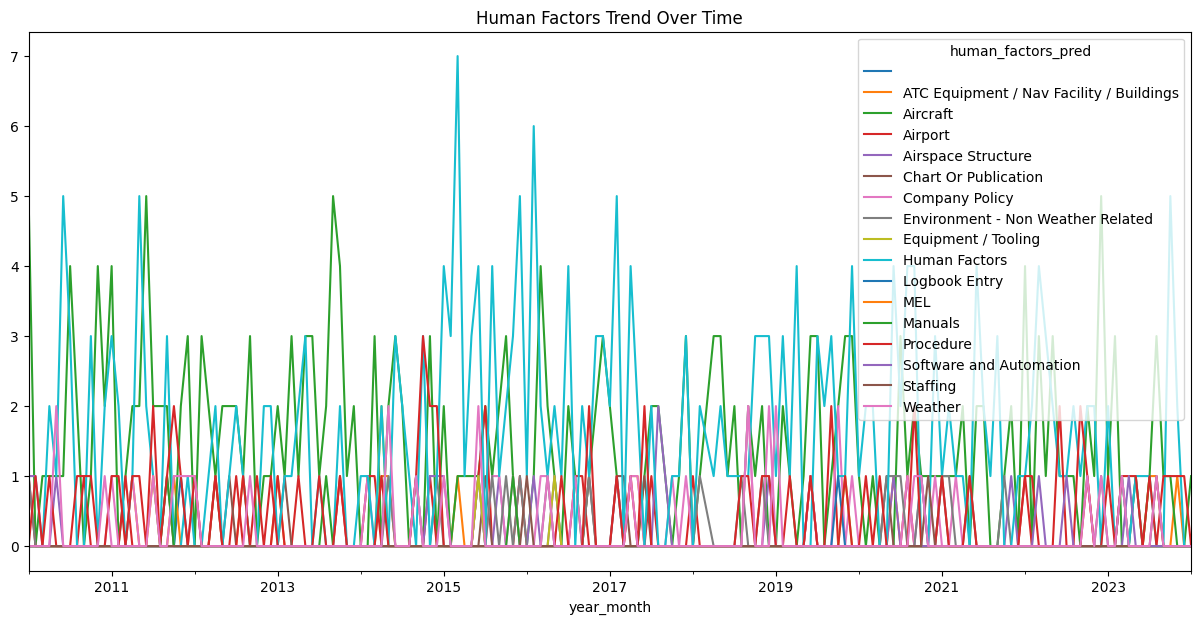

In [10]:
# # Group by year_month and count occurrences
human_factors_trend = data.groupby('year_month')['human_factors_pred'].value_counts().unstack().fillna(0)
# # historical_trends_trend = data.groupby('year_month')['historical_trends_pred'].value_counts().unstack().fillna(0)

# # Plot trends
human_factors_trend.plot(figsize=(15, 7), title='Human Factors Trend Over Time')
plt.show()

## Primary Factors

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Assume 'human_factors_labels' is your target variable for human factors classification
X_train, X_test, y_train, y_test = train_test_split(normalized_matrix, data['Primary_Problem'], test_size=0.25, random_state=42)

classifier_human_factors = OneVsRestClassifier(SVC(kernel='rbf', class_weight='balanced'))
classifier_human_factors.fit(X_train, y_train)

# Evaluate performance
y_pred_human_factors = classifier_human_factors.predict(X_test)
print(classification_report(y_test, y_pred_human_factors))

                                              precision    recall  f1-score   support

    ATC Equipment / Nav Facility / Buildings       1.00      0.21      0.35        33
                                    Aircraft       0.77      0.89      0.83       525
                                     Airport       0.67      0.27      0.38        37
                          Airspace Structure       1.00      0.13      0.23        23
                                   Ambiguous       0.19      0.07      0.10       138
                        Chart Or Publication       0.50      0.10      0.16        31
                              Company Policy       0.10      0.02      0.03        52
           Environment - Non Weather Related       0.20      0.02      0.04        44
                         Equipment / Tooling       1.00      0.09      0.17        11
                               Human Factors       0.53      0.82      0.64       619
Incorrect / Not Installed / Unavailable Part       0.

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_module

In [25]:
# Assuming you have a 'date' column in your dataset
data['year_month'] = data['DateTime'].dt.to_period('M')

# Combine predictions with original data
data['primary_factors_pred'] = classifier_human_factors.predict(normalized_matrix)

data

,ACN,Narrative,Callback,Synopsis,Contributing_Factors,Primary_Problem,Contributing_Factors1,Contributing_Factors2,Contributing_Factors3,Contributing_Factors4,...,Contributing_Factors7,Contributing_Factors8,Contributing_Factors9,Contributing_Factors10,DateTime,Year,Month,Combined_Text,year_month,primary_factors_pred
40938,1489429,The weather clear smooth dark terrain officer ...,NaN,B737 First Officer reported SID crossing restr...,Human Factors,Human Factors,Human Factors,None,None,None,...,None,None,None,None,2017-10-01,2017,10,The weather clear smooth dark terrain officer ...,2017-10,Human Factors
30369,1310361,Last night early evening walked Gate Jetway tr...,NaN,An Aircraft Maintenance Technician reports num...,Company Policy; Staffing; Procedure; Human Fac...,Company Policy,Company Policy,Staffing,Procedure,Human Factors,...,None,None,None,None,2015-11-01,2015,11,Last night early evening walked Gate Jetway tr...,2015-11,Company Policy
32504,1342763,line thunderstorms approaching PNS west After ...,NaN,An EMB 145 Captain reported losing reliable ai...,Aircraft; Weather,Weather,Aircraft,Weather,None,None,...,None,None,None,None,2016-03-01,2016,3,line thunderstorms approaching PNS west After ...,2016-03,Weather
652,874102,CRJ 200 altitude select problem reset climb de...,Reporter stated all Operators of the CRJ-200's...,An Air Carrier Maintenance Manager reports con...,Aircraft; Manuals,Aircraft,Aircraft,Manuals,None,None,...,None,None,None,None,2010-01-01,2010,1,CRJ 200 altitude select problem reset climb de...,2010-01,Aircraft
37280,1424003,working Local Control The airport unusual flow...,NaN,HIO Tower Controller reported airborne conflic...,Human Factors; Staffing; Procedure,Procedure,Human Factors,Staffing,Procedure,None,...,None,None,None,None,2017-02-01,2017,2,working Local Control The airport unusual flow...,2017-02,Procedure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12539,1004242,PAO Runway 13 NUQ Runway 14 NUQ C130 inbound r...,NaN,PAO Controller described NMAC traffic right ba...,Airspace Structure; Procedure; Human Factors,Procedure,Airspace Structure,Procedure,Human Factors,None,...,None,None,None,None,2012-04-01,2012,4,PAO Runway 13 NUQ Runway 14 NUQ C130 inbound r...,2012-04,Procedure
28617,1284428,Working sector 37 sectors 38 6400 25 65 combin...,NaN,ZDV Controller reported traffic overload weath...,Human Factors; Staffing; Weather,Weather,Human Factors,Staffing,Weather,None,...,None,None,None,None,2015-08-01,2015,8,Working sector 37 sectors 38 6400 25 65 combin...,2015-08,Weather
52373,1692190,Aircraft issue piece required emergency equipm...,NaN,Technician reported Dispatch directing flight ...,Aircraft; Human Factors; Logbook Entry; Proced...,Procedure,Aircraft,Human Factors,Logbook Entry,Procedure,...,None,None,None,None,2019-10-01,2019,10,Aircraft issue piece required emergency equipm...,2019-10,Procedure
11558,991465,ZBW transitioned new routing Kingston Sector W...,NaN,ZBW Controller voiced concern regarding new ro...,ATC Equipment / Nav Facility / Buildings; Proc...,ATC Equipment / Nav Facility / Buildings,ATC Equipment / Nav Facility / Buildings,Procedure,None,None,...,None,None,None,None,2012-01-01,2012,1,ZBW transitioned new routing Kingston Sector W...,2012-01,ATC Equipment / Nav Facility / Buildings


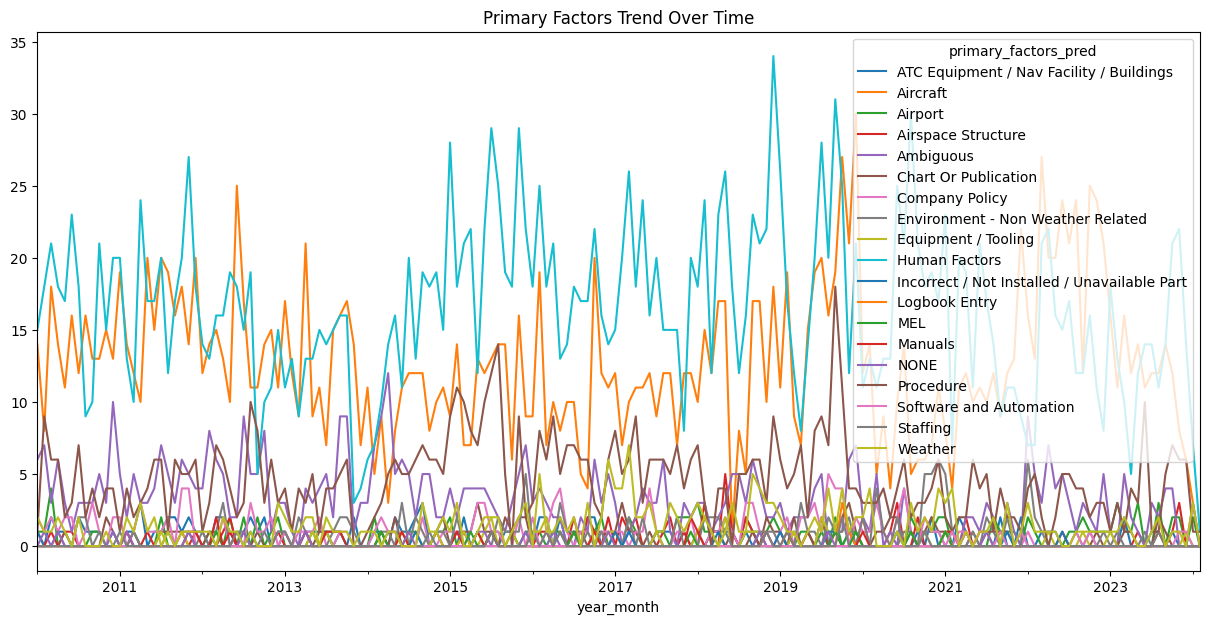

In [26]:
import matplotlib.pyplot as plt

# Group by year_month and count occurrences
human_factors_trend = data.groupby('year_month')['primary_factors_pred'].value_counts().unstack().fillna(0)

# Plot trends
human_factors_trend.plot(figsize=(15, 7), title='Primary Factors Trend Over Time')
plt.show()

# NTSB

In [19]:
ntsb_source_name = DATA_SOURCES[1]
ntsb_unique_id = unique_ids[1]

ntsb_folder_path = os.path.join("..", FOLDER_PATH_DATA_STORE, f"{ntsb_source_name}_store",data_type, ntsb_unique_id)
ntsb_file_name_list_unsorted = os.listdir(ntsb_folder_path)
ntsb_file_name_list = sorted(ntsb_file_name_list_unsorted)
# file_name_list

ntsb_name_list = [file_name.replace(' ', '_').lower().split('.')[0] for file_name in ntsb_file_name_list]
ntsb_name_list

['country',
 'events_sequence',
 'findings',
 'flight_crew',
 'ntsb_admin',
 'occurrences',
 'aircraft',
 'ct_iaids',
 'ct_seqevt',
 'dt_flight_crew',
 'dt_aircraft',
 'dt_events',
 'eadmspub_datadictionary',
 'engines',
 'events',
 'flight_time',
 'injury',
 'narratives',
 'seq_of_events',
 'states']

In [21]:
ntsb_data = {}

for i, row in enumerate(ntsb_file_name_list):
    key = ntsb_name_list[i]
    file_path = os.path.join(ntsb_folder_path, row)
    try:
        ntsb_data[key] = pd.read_csv(file_path, low_memory=False)
    except Exception as e:
        print(e)

No columns to parse from file
No columns to parse from file


In [32]:
ntsb_finding = ntsb_data['findings']
ntsb_finding


,ev_id,Aircraft_Key,finding_no,finding_code,finding_description,category_no,subcategory_no,section_no,subsection_no,modifier_no,Cause_Factor,lchg_date,lchg_userid,cm_inPc
0,20080107X00026,1,1,204151045,Personnel issues-Action/decision-Info processi...,2,4,15,10,45,C,09/25/20 18:05:31,NaN,T
1,20080107X00026,2,1,204151044,Personnel issues-Action/decision-Info processi...,2,4,15,10,44,C,09/25/20 18:05:31,NaN,T
2,20080109X00036,1,1,303404099,Environmental issues-Conditions/weather/phenom...,3,3,40,40,99,F,09/25/20 18:05:31,NaN,T
3,20080109X00036,1,2,106202020,Aircraft-Aircraft oper/perf/capability-Perform...,1,6,20,20,20,C,09/25/20 18:05:31,NaN,T
4,20080107X00027,1,1,303602099,Environmental issues-Conditions/weather/phenom...,3,3,60,20,99,F,09/25/20 18:04:02,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64405,20240312193930,1,3,303404082,Environmental issues-Conditions/weather/phenom...,3,3,40,40,82,NaN,04/30/24 18:00:03,maxc,T
64406,20240312193930,1,4,303404582,Environmental issues-Conditions/weather/phenom...,3,3,40,45,82,NaN,04/30/24 18:00:03,maxc,T
64407,20240319193964,1,3,303404085,Environmental issues-Conditions/weather/phenom...,3,3,40,40,85,NaN,04/30/24 18:00:04,dunk,T
64408,20240319193964,1,5,106202020,Aircraft-Aircraft oper/perf/capability-Perform...,1,6,20,20,20,NaN,04/30/24 18:00:04,dunk,T


In [67]:
ntsb_event = ntsb_data['events']
data = ntsb_data['narratives']
data['DateTime'] = ntsb_event['ev_date']
data['finding_description'] = ntsb_finding['finding_description']

data['narr_accp'] = data['narr_accp'].fillna('')
data['finding_description'] = data['finding_description'].fillna('')
data['narr_accp_2'] = data['narr_accp_2'].fillna('')

data

,ev_id,Aircraft_Key,narr_accp,narr_accf,narr_cause,narr_inc,lchg_date,lchg_userid,narr_accp_2,DateTime,finding_description
0,20080211X00175,1,import,NaN,NaN,NaN,08/03/23 13:29:08,gibs-i,,01/10/08 00:00:00,Personnel issues-Action/decision-Info processi...
1,20080107X00026,1,"On January 1, 2008, about 1430 Pacific standar...",The pilots were attending a fly-in at the airp...,The departing pilot's inadequate visual lookout.,NaN,09/25/20 18:05:31,NaN,,01/01/08 00:00:00,Personnel issues-Action/decision-Info processi...
2,20080107X00026,2,"On January 1, 2008, about 1430 Pacific standar...",The pilots were attending a fly-in at the airp...,The departing pilot's inadequate visual lookout.,NaN,09/25/20 18:05:31,NaN,,01/01/08 00:00:00,Environmental issues-Conditions/weather/phenom...
3,20080109X00036,1,The private pilot was conducting a touch-and-g...,The private pilot was conducting a touch-and-g...,The pilot's failure to maintain directional co...,NaN,09/25/20 18:05:31,NaN,,01/03/08 00:00:00,Aircraft-Aircraft oper/perf/capability-Perform...
4,20080107X00027,1,"On January 3, 2008, approximately 0225 central...","After an uneventful landing at night, the comm...",The line technician's failure to remain clear ...,NaN,09/25/20 18:04:02,NaN,,01/02/08 00:00:00,Environmental issues-Conditions/weather/phenom...
...,...,...,...,...,...,...,...,...,...,...,...
25640,20240408194054,1,"On April 8, 2024, at 1410 central daylight tim...",NaN,NaN,NaN,04/19/24 18:00:02,kaij,,05/18/23 00:00:00,Personnel issues-Action/decision-Action-Lack o...
25641,20240409194060,1,"On April 4, 2024, about 1900, a Kitfox Series ...",NaN,NaN,NaN,04/25/24 18:00:11,cawj,,05/20/23 00:00:00,Personnel issues-Task performance-Use of equip...
25642,20240409194062,1,"On April 4, 2024, at 1445 Pacific daylight tim...",NaN,NaN,NaN,04/23/24 18:00:00,cawj,,05/20/23 00:00:00,Aircraft-Aircraft oper/perf/capability-Perform...
25643,20240411194074,1,"On April 11, 2024, about 0825 central daylight...",NaN,NaN,NaN,04/25/24 18:00:11,kaij,,05/19/23 00:00:00,Personnel issues-Action/decision-Action-Incorr...


In [68]:

# Split the 'HumanFactors' column by the delimiter ';' and expand into separate columns
human_factors_split = data['finding_description'].str.split('/', expand=True)
# human_factors_split
# Rename the columns to something meaningful
human_factors_split.columns = [f'finding_description{i+1}' for i in range(human_factors_split.shape[1])]
# Concatenate the original dataframe with the new human factors columns
data = pd.concat([data, human_factors_split], axis=1)

# data = data.reset_index(drop=True)
# data['HumanFactors'] = data['HumanFactors'].str.split(';').explode().str.strip()
# data['HumanFactors'] =  data['HumanFactors'].explode().str.strip()
events_data = ntsb_data['events'].copy()
# events_data['DateTime'] = pd.to_datetime(events_data['ev_date'], format='%Y%m', errors='coerce')
data['DateTime'] = events_data['ev_date']

data['Year'] = events_data['ev_year']
data['Month'] = events_data['ev_month']

# data = data[data['Year'] == 2023]
# data

# Sample a subset of the data for faster training
data = data.sample(frac=0.03, random_state=42) 
data

,ev_id,Aircraft_Key,narr_accp,narr_accf,narr_cause,narr_inc,lchg_date,lchg_userid,narr_accp_2,DateTime,finding_description,finding_description1,finding_description2,finding_description3,finding_description4,finding_description5,finding_description6,finding_description7,Year,Month
3329,20090927X30818,1,The pilot reported that 1-2 seconds after land...,The pilot reported that 1-2 seconds after land...,Failure of the right landing gear wheel attach...,NaN,09/25/20 18:00:53,NaN,,10/02/09 00:00:00,Personnel issues-Task performance-Use of equip...,Personnel issues-Task performance-Use of equip,info-Use of equip,system-Pilot - C,None,None,None,None,2009,10
866,20080708X00984,1,"HISTORY OF FLIGHTOn June 29, 2008, at approxim...","The single-engine airplane, with a private pil...",The pilot's failure to maintain safe flying ai...,NaN,09/25/20 18:04:46,NaN,,06/17/08 00:00:00,Aircraft-Aircraft power plant-Engine (reciproc...,Aircraft-Aircraft power plant-Engine (reciproc...,wear,corrosion - C,None,None,None,None,2008,6
11438,20140624X52049,1,Witnesses stated the airplane made a steep tur...,Witnesses stated the airplane made a steep tur...,The uncertificated pilot's loss of control whi...,NaN,09/25/20 15:11:55,NaN,,07/07/14 00:00:00,Environmental issues-Physical environment-Runw...,Environmental issues-Physical environment-Runway,land,takeoff,taxi surfa-Wet-Contributed to outcome - F,None,None,None,2014,7
16132,20170605X02133,1,The pilot of the tailwheel-equipped airplane r...,The pilot of the tailwheel-equipped airplane r...,The pilot’s abrupt maneuver to avoid hay bales...,NaN,09/25/20 13:53:54,NaN,,06/14/17 00:00:00,Personnel issues-Task performance-Use of equip...,Personnel issues-Task performance-Use of equip,info-Aircraft control-Student pilot - C,None,None,None,None,None,2017,6
18720,20181113X74218,1,The pilot of the tailwheel-equipped airplane r...,The pilot of the tailwheel-equipped airplane r...,The pilot's failure to maintain directional co...,NaN,09/25/20 13:42:15,NaN,,12/20/18 00:00:00,Personnel issues-Task performance-Use of equip...,Personnel issues-Task performance-Use of equip,info-Aircraft control-Pilot - C,None,None,None,None,None,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25216,20230906193019,1,"On September 4, 2023, about 1100 central dayli...",NaN,NaN,NaN,09/29/23 18:00:03,sort,,12/14/21 00:00:00,Personnel issues-Action/decision-Action-Incorr...,Personnel issues-Action,decision-Action-Incorrect action performance-P...,None,None,None,None,None,2021,12
21528,20200922X14935,1,The government of Denmark has notified the NTS...,NaN,NaN,NaN,09/26/20 09:23:48,NaN,,10/05/20 00:00:00,Personnel issues-Task performance-Use of equip...,Personnel issues-Task performance-Use of equip,info-Aircraft control-Pilot - C,None,None,None,None,None,2020,10
11148,20140505X94433,1,The glider pilot was practicing cross country ...,The glider pilot was practicing cross country ...,The pilot's improper selection of an off-airpo...,NaN,09/25/20 15:11:05,NaN,,05/23/14 00:00:00,Aircraft-Aircraft oper/perf/capability-Perform...,Aircraft-Aircraft oper,perf,capability-Performance,control parameters-Directional control-Attain,maintain not possible,None,None,2014,5
14442,20160601X23412,1,The pilot reported that during takeoff with a ...,The pilot reported that during takeoff with a ...,The pilot exceeded the critical angle of attac...,NaN,09/25/20 14:28:32,NaN,,06/05/16 00:00:00,Aircraft-Aircraft propeller/rotor-Main rotor d...,Aircraft-Aircraft propeller,rotor-Main rotor drive-Engine,transmission coupling-Fatigue,wear,corrosion - C,None,None,2016,6


In [69]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
import re

# Define preprocessing functions
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

def extract_terms(text, min_length=2, max_length=200):
    terms = re.findall(r'\b\w{%d,%d}\b' % (min_length, max_length), text)
    return ' '.join(terms)

# Preprocess data
data['narr_accp'] = data['narr_accp'].apply(remove_stopwords).apply(extract_terms)
data['narr_accp_2'] = data['narr_accp_2'].apply(remove_stopwords).apply(extract_terms)

# Combine Narrative and Synopsis for feature extraction
data['Combined_Text'] = data['narr_accp'] + ' ' + data['narr_accp_2']

# TF-IDF weighting
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Combined_Text'])

# Normalize
normalized_matrix = normalize(tfidf_matrix, norm='l2')


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Assume 'human_factors_labels' is your target variable for human factors classification
X_train, X_test, y_train, y_test = train_test_split(normalized_matrix, data['finding_description1'], test_size=0.25, random_state=42)

classifier_human_factors = OneVsRestClassifier(SVC(kernel='rbf', class_weight='balanced'))
classifier_human_factors.fit(X_train, y_train)

# Evaluate performance
y_pred_human_factors = classifier_human_factors.predict(X_test)
print(classification_report(y_test, y_pred_human_factors))


                                                                                                       precision    recall  f1-score   support

                                                                           Aircraft-Aircraft handling       0.00      0.00      0.00         1
                                                                               Aircraft-Aircraft oper       0.12      0.31      0.18        32
                                    Aircraft-Aircraft power plant-(general)-(general)-Malfunction - C       0.00      0.00      0.00         1
               Aircraft-Aircraft power plant-Engine (reciprocating)-Recip eng cyl section-Failure - C       0.00      0.00      0.00         1
          Aircraft-Aircraft power plant-Engine (reciprocating)-Recip engine power section-Failure - C       0.00      0.00      0.00         1
              Aircraft-Aircraft power plant-Engine (reciprocating)-Recip engine power section-Fatigue       0.00      0.00      0.00         

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/py

In [72]:
import matplotlib.pyplot as plt

# Assuming you have a 'date' column in your dataset
data['year_month'] = data['DateTime'].dt.to_period('M')

# Combine predictions with original data
data['human_factors_pred'] = classifier_human_factors.predict(normalized_matrix)

data

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# # Group by year_month and count occurrences
human_factors_trend = data.groupby('year_month')['human_factors_pred'].value_counts().unstack().fillna(0)
# # historical_trends_trend = data.groupby('year_month')['historical_trends_pred'].value_counts().unstack().fillna(0)

# # Plot trends
human_factors_trend.plot(figsize=(15, 7), title='Human Factors Trend Over Time')
plt.show()
